In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datas = {
    "iq":[10,100,110,120,80],
    "Cgpa":[8,7,6,9,5],
    "Salary":[3,4,8,6,3]
}

In [ ]:
df = pd.DataFrame(datas)
df.head()

,iq,Cgpa,Salary
0,10,8,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


In [ ]:
# for model 1
df["pred1"]=df["Salary"].mean()
df.head()

,iq,Cgpa,Salary,pred1
0,10,8,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


In [ ]:
df["pseudo_recidual"] = df["Salary"]-df["pred1"]
df.head()

,iq,Cgpa,Salary,pred1,pseudo_recidual
0,10,8,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


In [ ]:
X = df.drop(columns=["Salary","pred1","pseudo_recidual"])
y = df["pseudo_recidual"]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X,y)


DecisionTreeRegressor()

[Text(0.5, 0.8333333333333334, 'x[0] <= 105.0\nsquared_error = 3.76\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 90.0\nsquared_error = 0.222\nsamples = 3\nvalue = -1.467'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -1.8'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.8'),
 Text(0.75, 0.5, 'x[1] <= 7.5\nsquared_error = 1.0\nsamples = 2\nvalue = 2.2'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.2')]

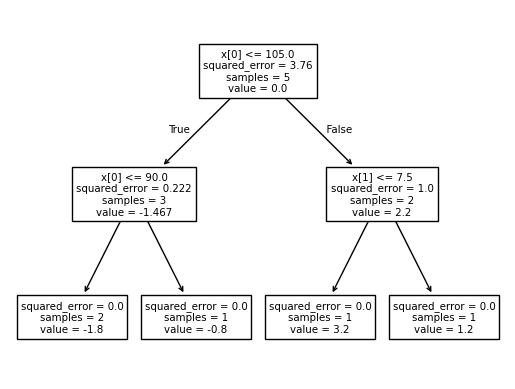

In [ ]:
plot_tree(dt)

In [ ]:
df["prediction_model2"]=dt.predict(X)
df.head()

,iq,Cgpa,Salary,pred1,pseudo_recidual,prediction_model2
0,10,8,3,4.8,-1.8,-1.8
1,100,7,4,4.8,-0.8,-0.8
2,110,6,8,4.8,3.2,3.2
3,120,9,6,4.8,1.2,1.2
4,80,5,3,4.8,-1.8,-1.8


In [ ]:
# if there is only two models
# prediction = m1 + lr*m2
df["Actual_predicton"]=df["pred1"] + 0.1*df["prediction_model2"]
df.head()

,iq,Cgpa,Salary,pred1,pseudo_recidual,prediction_model2,Actual_predicton
0,10,8,3,4.8,-1.8,-1.8,4.62
1,100,7,4,4.8,-0.8,-0.8,4.72
2,110,6,8,4.8,3.2,3.2,5.12
3,120,9,6,4.8,1.2,1.2,4.92
4,80,5,3,4.8,-1.8,-1.8,4.62


In [ ]:
df["sudo_recedual"]=df["Salary"]-df["Actual_predicton"]
df.head()

,iq,Cgpa,Salary,pred1,pseudo_recidual,prediction_model2,Actual_predicton,sudo_recedual
0,10,8,3,4.8,-1.8,-1.8,4.62,-1.62
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72
2,110,6,8,4.8,3.2,3.2,5.12,2.88
3,120,9,6,4.8,1.2,1.2,4.92,1.08
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62


In [ ]:
X = df.drop(columns=["Salary","pred1","pseudo_recidual","prediction_model2","Actual_predicton"])
y= df["sudo_recedual"]

[Text(0.5, 0.8333333333333334, 'x[0] <= 105.0\nsquared_error = 3.046\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 90.0\nsquared_error = 0.18\nsamples = 3\nvalue = -1.32'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -1.62'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.72'),
 Text(0.75, 0.5, 'x[0] <= 115.0\nsquared_error = 0.81\nsamples = 2\nvalue = 1.98'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 2.88'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 1.08')]

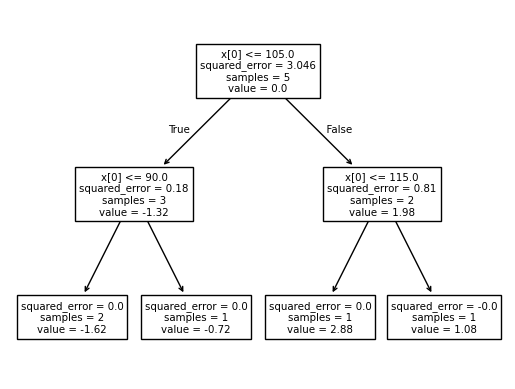

In [ ]:
df2 = DecisionTreeRegressor()
df2.fit(X,y)
plot_tree(df2)

In [ ]:
df["prediction_model3"]=df2.predict(X)
df.head()

,iq,Cgpa,Salary,pred1,pseudo_recidual,prediction_model2,Actual_predicton,sudo_recedual,prediction_model3
0,10,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62


In [ ]:
df["Actual_prediction2"]=df["pred1"]+0.1*df["prediction_model2"]+0.1*df["prediction_model3"]
df.head()
# this process continues untill actual value is get predicted

,iq,Cgpa,Salary,pred1,pseudo_recidual,prediction_model2,Actual_predicton,sudo_recedual,prediction_model3,Actual_prediction2
0,10,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72,4.648
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88,5.408
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08,5.028
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458
